# Importing Libararies

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## reading data 

In [109]:
data = pd.read_csv(r"D:\csvandxlsx files\Bengaluru_House_Data.csv")

In [110]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## cheacking shape of data

In [111]:
data.shape

(13320, 9)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## finding total null values in data 

In [113]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### finding total percentage of null values in each columns

In [114]:
(data.isnull().sum()/data.shape[0])*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

## finding overall null vlues in dataset

In [115]:
data.isnull().sum().sum()

6201

### finding percentage of total null vlues

In [116]:
(data.isnull().sum().sum()/(data.shape[0]*data.shape[1]))*100

5.172672672672673

# ploting graph of null vlues using seaborn 

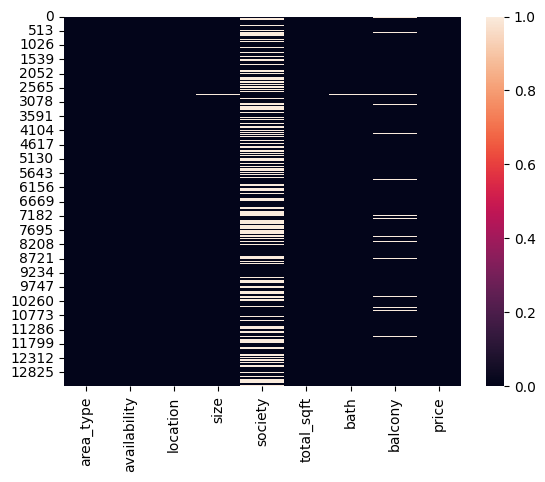

In [117]:
sns.heatmap(data.isnull())
plt.show()

# deleting null values

In [118]:
#drop function will remove data by columns wise 
# inthis i am going to remove column ( society )
data.drop(columns=["society"] , inplace=True)

In [119]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [120]:
#checking
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [121]:
#dropna function will remove all null raws

In [122]:
#data.dropna(inplacr=True)

In [123]:
# so now working in each columns

# area_type	column

In [124]:
data.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [125]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [126]:
data["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [127]:
data["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [128]:
#  the Carpet Area count is too small, and combining it with Plot Area ensures a more balanced dataset.

In [129]:
data["area_type"] = data["area_type"].apply(lambda x : "Plot  Area" if x == "Carpet  Area" else x )

In [130]:
data["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2112
Name: count, dtype: int64

# availability	

In [131]:
data["availability"].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [132]:
data["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [133]:
# To group all dates into their respective months

In [134]:
data["availability"] = data["availability"].replace("Immediate Possession","Ready To Move")

In [135]:
data["availability"].unique() ["18","May"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [136]:
def extract_month(value):
    if value == "Ready To Move":
        return value
    else: 
        return value.split("-")[-1]

In [137]:
data["availability"] = data["availability"].apply(extract_month)

In [138]:
data["availability"].value_counts()

availability
Ready To Move    10597
Dec                728
May                338
Apr                298
Aug                249
Mar                246
Jul                206
Jun                200
Jan                126
Oct                 91
Sep                 87
Nov                 79
Feb                 75
Name: count, dtype: int64

# location

In [139]:
data["location"].value_counts() #other

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [140]:
data["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [141]:
locationsdic = data["location"].value_counts()
data["location"] = data["location"].apply(lambda x : x if locationsdic[x] >= 10 else "others")


KeyError: nan

# we faced this issue because we have one nan value in this column

In [142]:
data["location"].isnull().sum()

1

In [143]:
data["location"].fillna(data["location"].mode()[0], inplace=True)

In [144]:
data["location"].isnull().sum()

0

In [145]:
data["location"] = data["location"].apply(lambda x : x if locationsdic[x] >= 50 else "others")

In [146]:
data["location"].value_counts()

location
others                      7149
Whitefield                   541
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
Yelahanka                    213
Uttarahalli                  186
Hebbal                       177
Marathahalli                 175
Raja Rajeshwari Nagar        171
Hennur Road                  152
Bannerghatta Road            152
7th Phase JP Nagar           149
Haralur Road                 142
Electronic City Phase II     132
Rajaji Nagar                 107
Chandapura                   100
Bellandur                     96
KR Puram                      91
Hoodi                         88
Electronics City Phase 1      88
Yeshwanthpur                  85
Begur Road                    84
Sarjapur                      82
Kasavanhalli                  80
Harlur                        79
Banashankari                  75
Hormavu                       74
Kengeri                       73
R

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [148]:
data = data.drop("location", axis=1)

In [149]:
data.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   size          13304 non-null  object 
 3   total_sqft    13320 non-null  object 
 4   bath          13247 non-null  float64
 5   balcony       12711 non-null  float64
 6   price         13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


# Size

In [153]:
data["size"].isnull().sum()

16

In [154]:
data["size"].fillna(data["size"].mode()[0],inplace=True)

C:\Users\muneeb ur rehman\AppData\Local\Temp\ipykernel_16112\4017260945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["size"].fillna(data["size"].mode()[0],inplace=True)


In [155]:
data["size"].isnull().sum()

0

In [55]:
data["size"].value_counts()

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [56]:
data["size"].unique()    

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [57]:
len(data["size"].unique())

31

In [46]:
# dealing with unrealistic or inconsistent data like 43 BHK or 19 BHK requires a logical and domain-specific approach.
# Group All Sizes Above a Threshold into a Single Category

In [47]:
# def clean_size(x):
#     num = int(x.split()[0])
#     return f"{num} BHK" if num <= 10 else "10+ BHK"

In [48]:
# data["size"] = data["size"].apply(clean_size)

In [58]:
# we have to creat new column where i can get the values of size
data["BHK"] = data["size"].apply(lambda x: int(x.split()[0]))

In [49]:
#  # checking
# data["size"].value_counts()

size
2 BHK      5544
3 BHK      4857
4 BHK      1417
1 BHK       656
5 BHK       356
6 BHK       221
7 BHK       100
8 BHK        89
9 BHK        54
10 BHK       14
10+ BHK      12
Name: count, dtype: int64

# total_sqft

In [59]:
data["total_sqft"].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [60]:
data["total_sqft"] = data["total_sqft"].apply(lambda x : int(x))

ValueError: invalid literal for int() with base 10: '2100 - 2850'

In [61]:
# '2100 - 2850'  in the error i have seen that in our data vales like this so lets handle this  error

In [62]:
def clean_total_sqft(x):
    x = x.strip()
    if "-" in x:
        num = x.split("-")
        if len(num) == 2:
            try:
                return int((int(num[0])+int(num[1]))/2)
            except ValueError:
                return None
    else :
        try:
            return int(x)
        except ValueError:
            return None

In [63]:
data["total_sqft"] = data["total_sqft"].apply(clean_total_sqft)

In [64]:
data["total_sqft"].value_counts().index.tolist()

[1200.0,
 1100.0,
 1500.0,
 2400.0,
 600.0,
 1000.0,
 1350.0,
 1050.0,
 1300.0,
 1250.0,
 900.0,
 1400.0,
 1800.0,
 1150.0,
 1600.0,
 1140.0,
 2000.0,
 1450.0,
 800.0,
 1650.0,
 1075.0,
 3000.0,
 1020.0,
 2500.0,
 1125.0,
 1550.0,
 1160.0,
 1700.0,
 950.0,
 1260.0,
 1180.0,
 1255.0,
 1220.0,
 1080.0,
 700.0,
 1070.0,
 750.0,
 1225.0,
 4000.0,
 1175.0,
 1320.0,
 1240.0,
 2100.0,
 1060.0,
 1230.0,
 1210.0,
 850.0,
 1185.0,
 1280.0,
 1410.0,
 1270.0,
 1190.0,
 1170.0,
 1750.0,
 1025.0,
 1330.0,
 1310.0,
 1850.0,
 1290.0,
 1194.0,
 1065.0,
 1090.0,
 1215.0,
 1115.0,
 500.0,
 1360.0,
 1530.0,
 2700.0,
 1120.0,
 1900.0,
 3500.0,
 1464.0,
 1340.0,
 1430.0,
 1560.0,
 2200.0,
 1205.0,
 1035.0,
 1165.0,
 3600.0,
 1128.0,
 1130.0,
 1355.0,
 1145.0,
 1275.0,
 1040.0,
 1155.0,
 2800.0,
 1420.0,
 1105.0,
 1680.0,
 1590.0,
 1760.0,
 1460.0,
 1216.0,
 650.0,
 1245.0,
 1475.0,
 1495.0,
 1305.0,
 1010.0,
 2600.0,
 1030.0,
 1110.0,
 1440.0,
 1575.0,
 883.0,
 985.0,
 1246.0,
 1315.0,
 1027.0,
 5000.0,
 13

# bath

In [65]:
data["bath"].isnull().sum()

73

In [66]:
data["bath"].fillna(data["bath"].median(),inplace=True)

C:\Users\muneeb ur rehman\AppData\Local\Temp\ipykernel_23448\3374748851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["bath"].fillna(data["bath"].median(),inplace=True)


In [67]:
data["bath"].isnull().sum()

0

In [68]:
data["bath"].value_counts()

bath
2.0     6981
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

# balcony

In [69]:
data["balcony"].isnull().sum()

609

In [70]:
data["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [71]:
data["balcony"].fillna(data["balcony"].mode()[0], inplace=True)

C:\Users\muneeb ur rehman\AppData\Local\Temp\ipykernel_23448\4067309864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["balcony"].fillna(data["balcony"].mode()[0], inplace=True)


In [72]:
data["balcony"].isnull().sum()

0

In [73]:
data["balcony"].value_counts()

balcony
2.0    5722
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

# price

In [74]:
data["price"].isnull().sum()

0

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13182 non-null  float64
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
 8   BHK           13320 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 936.7+ KB


In [83]:
# saved this clean data into another csv file
data.to_csv("clean_data_house.csv",index=False)

# so now data cleaning has been done now do data preprocessing 

In [92]:
df = pd.read_csv("clean_data_house.csv")

In [93]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,others,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,others,4 BHK,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13182 non-null  float64
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
 8   BHK           13320 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 936.7+ KB


In [95]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,others,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [ ]:
# we have to delet the columns that are not usefull for us [area_type	availability	location	size]